In [1]:
%pylab inline
from nilearn import plotting
from IPython.display import display
from pythreejs import *
from mindboggle.mio.vtks import read_vtk
from nbpapaya import Brain, Overlay
import os
from glob import glob

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
Brain("/home/jovyan/work/data/ds000114/sub-01/anat/sub-01_T1w.nii.gz")

doing checks /home/jovyan/.jupyter/custom/


In [4]:
def createMeshOpts(vtks, csvs):
    MeshOpts =  {}
    for i,v in enumerate(vtks):
        MeshOpts[v] = {  
                      "filename": csvs[i],
                      "colormin": "#0000FF", 
                      "colormax": "#FF0000",
                      "vmin": 2,
                      "vmax": 5,
                      "key": "freesurfer thickness",
                      "key_options": ["freesurfer thickness", "freesurfer curvature", 
                                    "area", "freesurfer convexity (sulc)", "geodesic depth", 
                                    "mean curvature", "travel depth"],    
                      "threshold": 2.4,
                      "mesh_transparency": 1,
                      "mesh_visible": True,
                      "overlay_transparency": 1
                  }
    return MeshOpts

In [5]:
#vtks = glob(os.path.abspath("../../labels/*.vtk"))
#csvs = glob(os.path.abspath("../../labels/*.csv"))
MeshOpts = createMeshOpts(["/home/jovyan/work/data/mindboggled/sub-02/shapes/left_cortical_surface/freesurfer_curvature.vtk"],
                          ["/home/jovyan/work/data/mindboggled/sub-02/tables/left_cortical_surface/vertices.csv"])

In [6]:
Overlay(MeshOpts)

doing checks /home/jovyan/.jupyter/custom/
{'/home/jovyan/work/data/mindboggled/sub-02/shapes/left_cortical_surface/freesurfer_curvature.vtk': 'papaya_data/tmpptr0ekvl.vtk'}
/files/papaya_data/tmpptr0ekvl.vtk
{'/home/jovyan/work/data/mindboggled/sub-02/shapes/left_cortical_surface/freesurfer_curvature.vtk': {'threshold': 2.4, 'key': 'freesurfer thickness', 'vmax': 5, 'overlay_transparency': 1, 'key_options': ['freesurfer thickness', 'freesurfer curvature', 'area', 'freesurfer convexity (sulc)', 'geodesic depth', 'mean curvature', 'travel depth'], 'mesh_transparency': 1, 'vmin': 2, 'mesh_visible': True, 'colormax': '#FF0000', 'filename': '/files/papaya_data/tmpc66_h1gj.csv', 'colormin': '#0000FF'}} {'/files/papaya_data/tmpptr0ekvl.vtk': {'threshold': 2.4, 'key': 'freesurfer thickness', 'vmax': 5, 'overlay_transparency': 1, 'key_options': ['freesurfer thickness', 'freesurfer curvature', 'area', 'freesurfer convexity (sulc)', 'geodesic depth', 'mean curvature', 'travel depth'], 'mesh_tran

In [2]:
def displayVTK(vertices, faces):
    geom = FaceGeometry(vertices=np.asarray(points).ravel().tolist(), face3=np.asarray(faces).ravel().tolist())
    material=LambertMaterial(wireframe=False)
    mesh = Mesh(geometry=geom, material=material,position=[0, 0, 0])

    scene = Scene(children=[mesh, AmbientLight(color='#777777')])

    c = PerspectiveCamera(position=[0, 5, 200], up=[0, 0, 1],
                          children=[DirectionalLight(color='white', 
                                                     position=[3, 5, 1], 
                                                     intensity=0.5)])
    renderer = Renderer(camera=c, 
                        scene=scene, 
                        controls=[OrbitControls(controlling=c)])
    display(renderer)

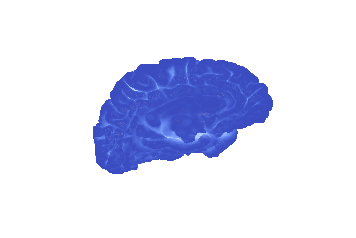

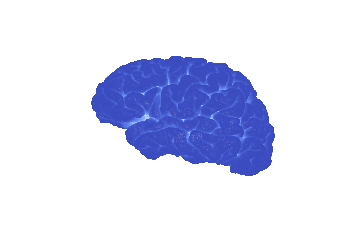

In [ ]:
_ = plotting.plot_surf_stat_map([np.asarray(points),np.asarray(faces)], stat_map=np.asarray(scalars), hemi='left',
                             bg_on_data=True,
                            darkness=.5)
_ = plotting.plot_surf_stat_map([np.asarray(points),np.asarray(faces)], stat_map=np.asarray(scalars), hemi='left',
                             bg_on_data=True, view="medial",
                            darkness=.5)